# **System Recommendation: Cosmetics Dataset**

# **Import Library**

Pertama kita mengimpor library yang dibutuhkan terlebih dahulu.

In [ ]:
# menginstal paket kaggle yang digunakan untuk mengakses dataset dari Kaggle melalui API
!pip install kaggle

# menginstal paket keras yang digunakan untuk membangun dan melatih model deep learning
!pip install keras

In [ ]:
import os        # modul untuk operasi file dan direktori
import shutil    # modul untuk menyalin file dan direktori
import zipfile   # modul untuk mengekstrak file zip
import textwrap  # modul untuk membungkus teks dalam lebar tertentu

import numpy as np    # library untuk komputasi numerik dengan array
import pandas as pd   # library untuk manipulasi dan analisis data
import seaborn as sns # library visualisasi data berbasis matplotlib
import matplotlib.pyplot as plt   # library utama untuk visualisasi data

import tensorflow as tf           # library machine learning dan deep learning dari Google
from tensorflow import keras      # modul utama keras yang ada di tensorflow
from tensorflow.keras import layers   # modul layer pada keras untuk membangun model neural network
from sklearn.feature_extraction.text import TfidfVectorizer   # mengubah teks menjadi fitur numerik berbasis TF-IDF
from sklearn.metrics.pairwise import cosine_similarity        # menghitung kemiripan (similarity) antar vektor
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

from collections import Counter             # menghitung frekuensi elemen dalam koleksi (seperti list)
from tensorflow.keras import regularizers   # menambahkan regularisasi pada model neural network

# **Data Understanding**

## Data Loading

In [ ]:
# mengimpor modul upload file di Google Colab
from google.colab import files
files.upload()

In [ ]:
# membuat folder .kaggle di direktori home jika tidak ada
!mkdir -p ~/.kaggle

# menyalin file kaggle.json ke folder .kaggle
!cp kaggle.json ~/.kaggle/

#  mengatur permission file kaggle.json agar hanya bisa diakses oleh user
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# mengunduh dataset dari Kaggle menggunakan API dan mendownload file zip
!kaggle datasets download -d kingabzpro/cosmetics-datasets

os.listdir()

In [ ]:
# membaca file CSV 'cosmetics.csv' menjadi DataFrame
with zipfile.ZipFile("cosmetics-datasets.zip", "r") as zip_ref:
    zip_ref.extractall("dataset-folder")

df = pd.read_csv("/content/dataset/cosmetics_new.csv")

# menampilkan 5 baris pertama
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,user_id
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,LA0
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,SK-1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,DRU2
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,LA3
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,IT4


In [ ]:
# menampilkan jumlah baris dan kolom pada DataFrame
df.shape

(1472, 12)

Dataset memiliki 1472 baris dan 12 kolom.

In [ ]:
# menampilkan informasi ringkas tentang DataFrame
df.info()

In [ ]:
# menampilkan statistik deskriptif untuk kolom numerik
df.describe()

## Data Cleaning

In [ ]:
# mengecek jumlah nilai kosong di setiap kolom
df.isnull().sum()

# **Exploratory Data Analysis**

## Product Distribution for Specific Skin Types

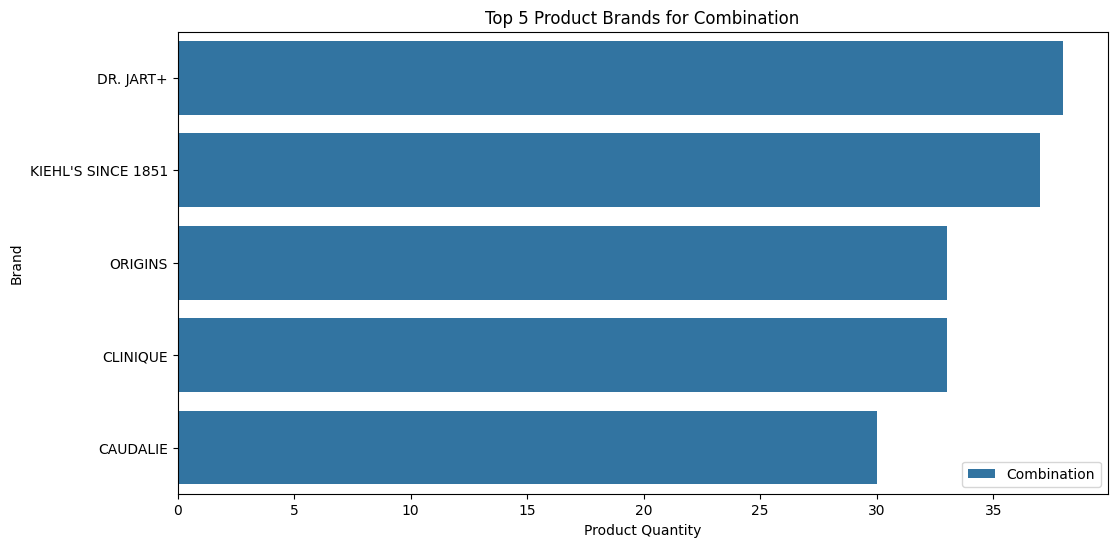

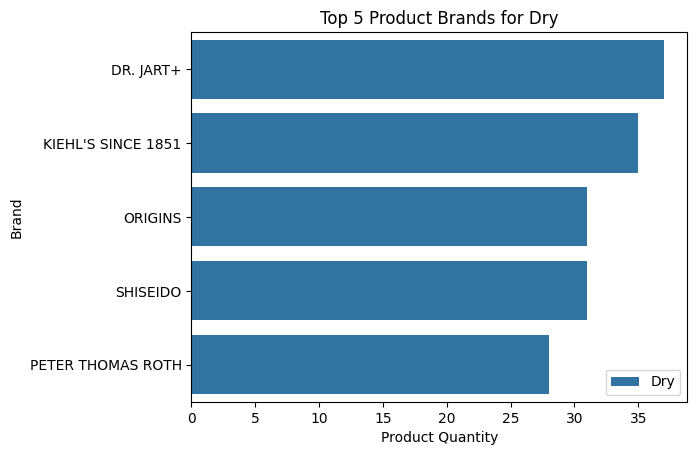

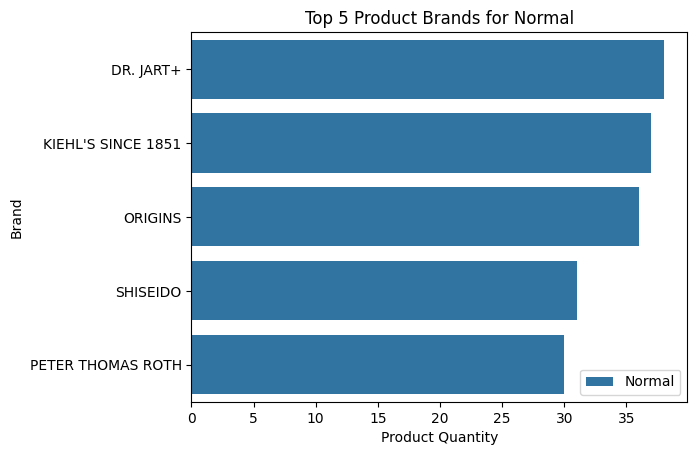

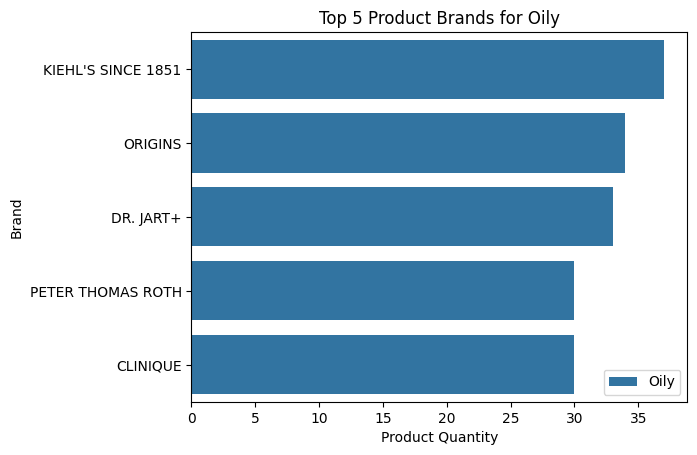

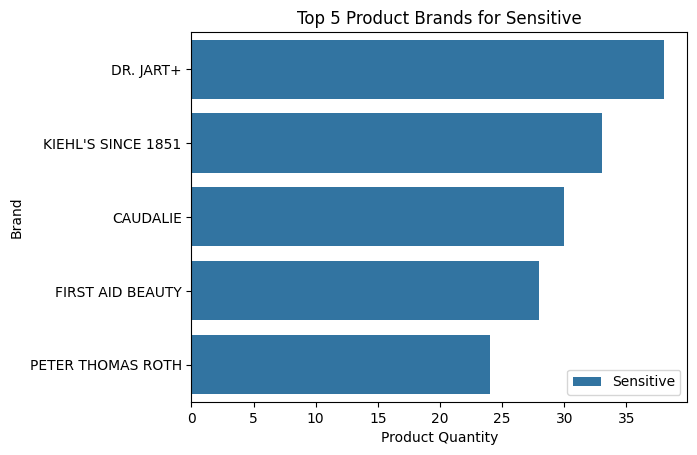

In [ ]:
plt.figure(figsize=(12,6))

# membuat list berisi nama-nama kolom yang merepresentasikan tipe kulit
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

# melakukan perulangan untuk setiap tipe kulit yang ada di dalam list skin_types
for st in skin_types:
    top_brands = df[df[st]==1]['Brand'].value_counts().head(5)
    sns.barplot(x=top_brands.values, y=top_brands.index, label=st)
    plt.title(f'Top 5 Product Brands for {st}')
    plt.xlabel('Product Quantity')
    plt.ylabel('Brand')
    plt.show()

## Ingredients Affect

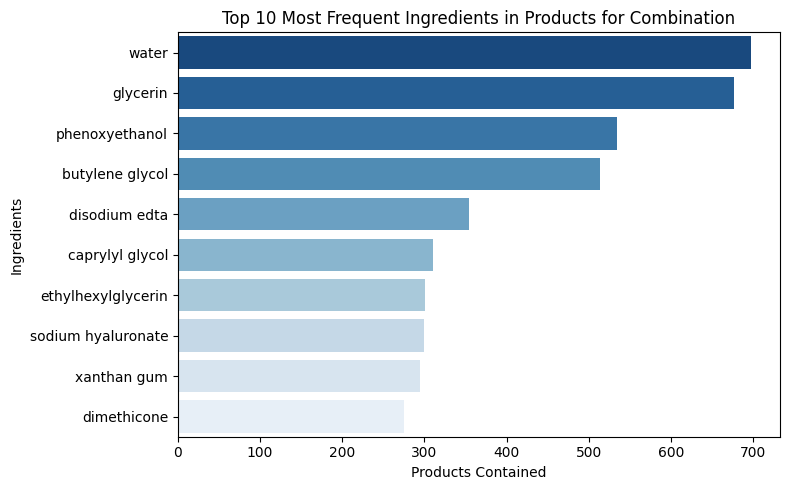

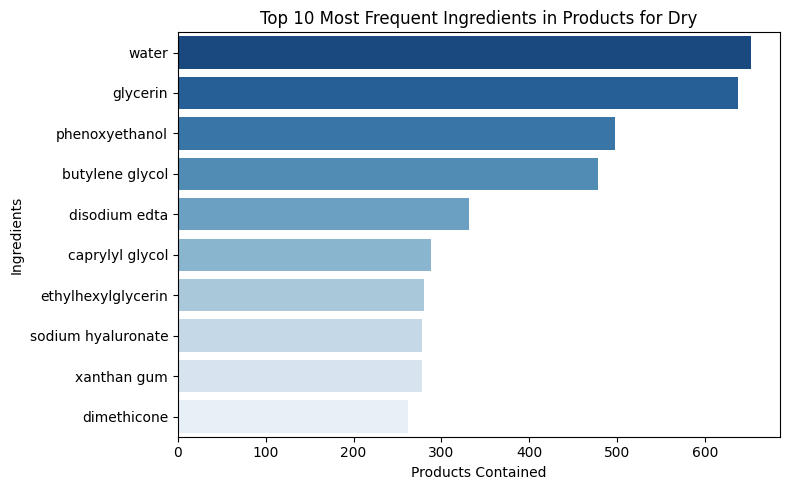

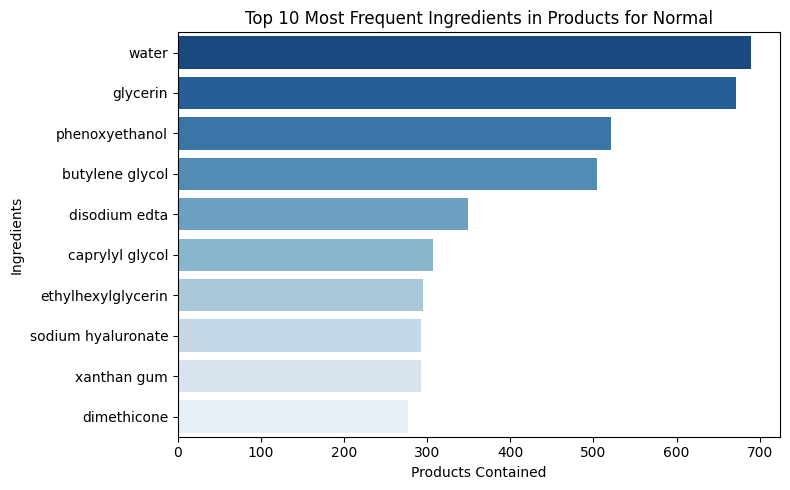

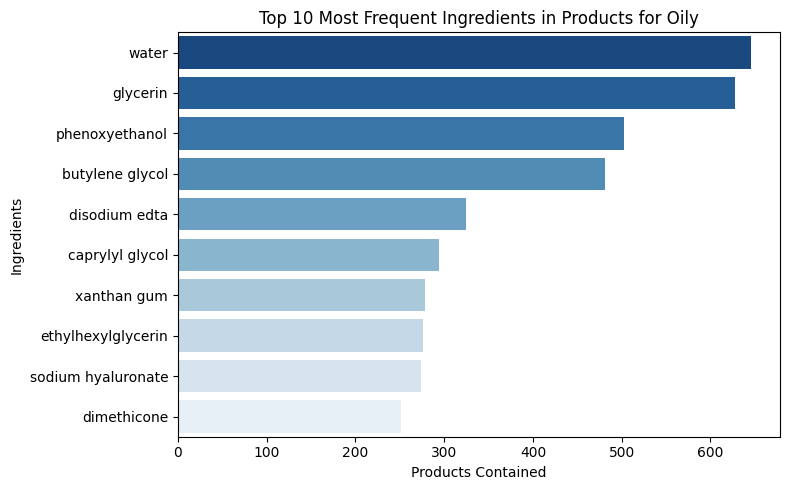

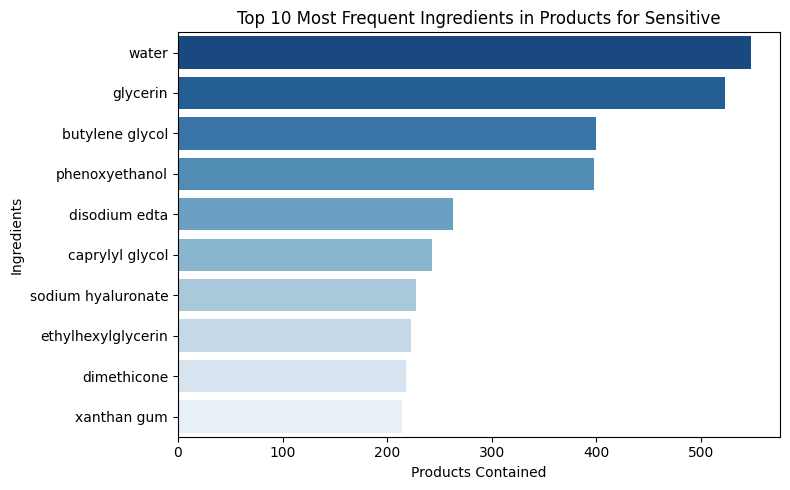

In [ ]:
# list yang berisi kategori tipe kulit yang ada pada dataset
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

# mengambil daftar bahan yang paling sering muncul pada produk untuk tipe kulit tertentu
def common_ingredients(df, skin_type, topn=10):
    ings = df[df[skin_type]==1]['Ingredients'].dropna().str.lower().str.cat(sep=',')
    ing_list = [i.strip() for i in ings.split(',') if i.strip()]
    return Counter(ing_list).most_common(topn)

# melakukan perulangan untuk setiap tipe kulit.
for st in skin_types:
    top_ings = common_ingredients(df, st, 10)
    labels, values = zip(*top_ings) if top_ings else ([], [])
    plt.figure(figsize=(8,5))
    sns.barplot(x=list(values), y=list(labels), hue=list(labels), palette='Blues_r', legend=False)
    plt.title(f'Top 10 Most Frequent Ingredients in Products for {st}')
    plt.xlabel('Products Contained')
    plt.ylabel('Ingredients')
    plt.tight_layout()
    plt.show()



## Relationship Between the Ingredients Quantity and Product Rank

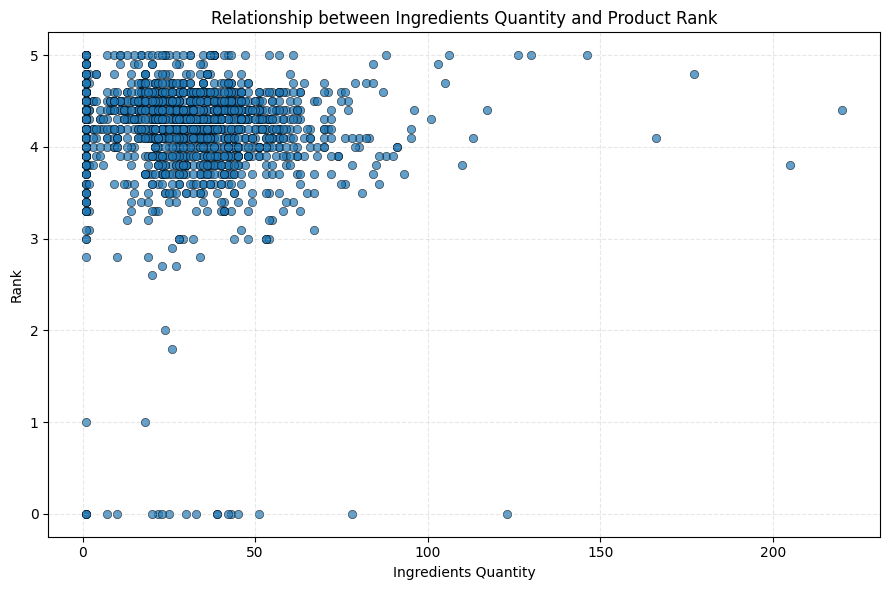

Correlation between the number of ingredients and product rank: -0.03


In [ ]:
# menghitung berapa banyak bahan (ingredients) yang terdapat pada setiap produk
jumlah_ingredients = df['Ingredients'].fillna('').apply(lambda x: len([i.strip() for i in x.split(',') if i.strip()]))

# scatterplot Hubungan Jumlah Ingredients dan Rank Produk
plt.figure(figsize=(9,6))
sns.scatterplot(x=jumlah_ingredients, y=df['Rank'], alpha=0.7, edgecolor='k')
plt.title('Relationship between Ingredients Quantity and Product Rank')
plt.xlabel('Ingredients Quantity')
plt.ylabel('Rank')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# korelasi dihitung antara jumlah bahan dan ranking produk
corr = np.corrcoef(jumlah_ingredients, df['Rank'])[0,1]
print(f"Correlation between the number of ingredients and product rank: {corr:.2f}")

## Ingredients Average  Price

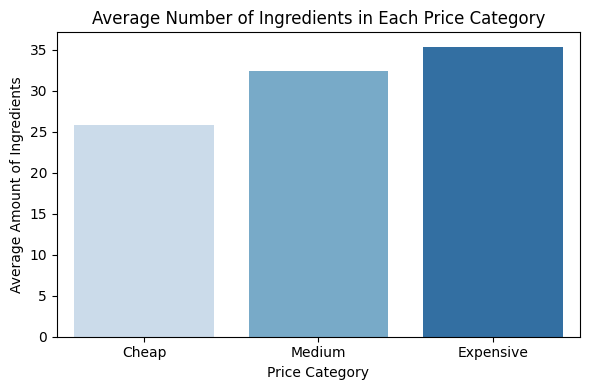

In [ ]:
# membuat Kategori Harga
kategori_harga = pd.qcut(df['Price'], q=3, labels=['Cheap', 'Medium', 'Expensive'])

# menghitung Jumlah Ingredients per Produk
jumlah_ingredients = df['Ingredients'].fillna('').apply(lambda x: len([i.strip() for i in x.split(',') if i.strip()]))

# membuat DataFrame baru yang hanya berisi kategori harga dan jumlah bahan.
temp_df = pd.DataFrame({
    'KategoriHarga': kategori_harga,
    'JumlahIngredients': jumlah_ingredients
})

# menghitung rata-rata ingredients per kategori harga
avg_ing = temp_df.groupby('KategoriHarga', observed=False)['JumlahIngredients'].mean().reset_index()

# membuat visualisasi
plt.figure(figsize=(6,4))
sns.barplot(data=avg_ing, x='KategoriHarga', y='JumlahIngredients', hue='KategoriHarga', palette='Blues', legend=False)
plt.title('Average Number of Ingredients in Each Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Amount of Ingredients')
plt.tight_layout()

# **Data Preparation**

## Content-Based Filtering

In [ ]:
# menggabungkan tipe kulit ke dalam list
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

# drop kolom yang tidak diperlukan
dataset_content = df.drop(columns=['Label', 'Price', 'Rank', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'user_id'])

# membuat kolom gabungan Brand_Product (Brand - Name (Label))
dataset_content["Brand_Product"] = (
    df["Brand"].astype(str) + " - " + df["Name"].astype(str) + " (" + df['Label'].astype(str) +")"
)

# fungsi untuk menggabungkan skin types yang bernilai 1
def join_skin_types(row):
    return ', '.join([st for st in skin_types if row[st]==1])

# membuat kolom gabungan + Label Ingredients + skin types yang bernilai
dataset_content["Ingredient_Skin"] = (
   "(" + df["Label"].astype(str) + ") " + df["Ingredients"].astype(str) + df.apply(join_skin_types, axis=1)
)

# menampilkan dataset 5 teratas
dataset_content.head()

,Brand,Name,Brand_Product,Ingredient_Skin
0,LA MER,Crème de la Mer,LA MER - Crème de la Mer (Moisturizer),"(Moisturizer) Algae (Seaweed) Extract, Mineral..."
1,SK-II,Facial Treatment Essence,SK-II - Facial Treatment Essence (Moisturizer),(Moisturizer) Galactomyces Ferment Filtrate (P...
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,DRUNK ELEPHANT - Protini™ Polypeptide Cream (M...,"(Moisturizer) Water, Dicaprylyl Carbonate, Gly..."
3,LA MER,The Moisturizing Soft Cream,LA MER - The Moisturizing Soft Cream (Moisturi...,"(Moisturizer) Algae (Seaweed) Extract, Cyclope..."
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,IT COSMETICS - Your Skin But Better™ CC+™ Crea...,"(Moisturizer) Water, Snail Secretion Filtrate,..."


In [ ]:
# mengonversi kolom 'Brand_Product' menjadi list
brand_product = dataset_content['Brand_Product'].tolist()

# mengonversi data series menjadi dalam bentuk list
ingredient_skin = dataset_content['Ingredient_Skin'].tolist()
brand = dataset_content['Brand'].tolist()
name = dataset_content['Name'].tolist()

# mengecek panjang setiap list (harus sama jumlahnya)
print(len(brand_product))
print(len(ingredient_skin))
print(len(brand))
print(len(name))

In [ ]:
# membuat dictionary untuk data
content_based_data = pd.DataFrame({
    "Brand": brand,
    "Name": name,
    "Brand_Product": brand_product,
    "Ingredient_Skin": ingredient_skin
})

# menampilkan 5 baris teratas
content_based_data.head()

,Brand,Name,Brand_Product,Ingredient_Skin
0,LA MER,Crème de la Mer,LA MER - Crème de la Mer (Moisturizer),"(Moisturizer) Algae (Seaweed) Extract, Mineral..."
1,SK-II,Facial Treatment Essence,SK-II - Facial Treatment Essence (Moisturizer),(Moisturizer) Galactomyces Ferment Filtrate (P...
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,DRUNK ELEPHANT - Protini™ Polypeptide Cream (M...,"(Moisturizer) Water, Dicaprylyl Carbonate, Gly..."
3,LA MER,The Moisturizing Soft Cream,LA MER - The Moisturizing Soft Cream (Moisturi...,"(Moisturizer) Algae (Seaweed) Extract, Cyclope..."
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,IT COSMETICS - Your Skin But Better™ CC+™ Crea...,"(Moisturizer) Water, Snail Secretion Filtrate,..."


In [ ]:
# menginisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# melakukan perhitungan idf pada data ingredient_skin
tf.fit(content_based_data["Ingredient_Skin"])

# mapping array dari fitur index integer ke fitur nama (fitur-fitur yang dipelajari)
feature_names = tf.get_feature_names_out()

# menampilkan fitur-fitur yang dipelajari oleh TfidfVectorizer
print(feature_names)

['00' '000' '002' ... 'zizyphus' 'zolinone' 'zostera']


In [ ]:
# melakukan fit dan transform ke bentuk matriks TF-IDF
tfidf_matrix = tf.fit_transform(content_based_data["Ingredient_Skin"])

# melihat ukuran matriks TF-IDF
print(tfidf_matrix.shape)

(1472, 4552)


In [ ]:
# mengubah matriks sparse hasil dari TfidfVectorizer
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# membentuk DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=content_based_data["Brand_Product"]
)

# menampilkan 5 baris teratas
tfidf_df.head()

,00,000,002,01,02,031,05,067,07,074,...,zerumbet,zeylanicum,zinc,zingiber,zingier,zizanoides,ziziphus,zizyphus,zolinone,zostera
Brand_Product,,,,,,,,,,,,,,,,,,,,,
LA MER - Crème de la Mer (Moisturizer),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.077267,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SK-II - Facial Treatment Essence (Moisturizer),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DRUNK ELEPHANT - Protini™ Polypeptide Cream (Moisturizer),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LA MER - The Moisturizing Soft Cream (Moisturizer),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.057941,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IT COSMETICS - Your Skin But Better™ CC+™ Cream with SPF 50+ (Moisturizer),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Collaborative-Based Filtering

In [ ]:
# daftar jenis kulit yang akan digunakan untuk penggabungan informasi
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

# menghapus kolom yang tidak diperlukan dari dataframe
dataset_filter = df.drop(columns=['Label', 'Price', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'])

# membuat kolom baru bernama Brand_Product yang merupakan gabungan dari Brand, Name, dan Label
dataset_filter["Brand_Product"] = (
    df["Brand"].astype(str) + " - " + df["Name"].astype(str) + " (" + df['Label'].astype(str) +")"
)

# fungsi untuk menggabungkan jenis kulit yang cocok (nilai 1)
def join_skin_types(row):
    return ', '.join([st for st in skin_types if row[st]==1])

# membuat kolom baru bernama Ingredient_Skin yang berisi label + ingredients + jenis kulit yang cocok
dataset_filter["Ingredient_Skin"] = (
    "(" + df["Label"].astype(str) + ") " + df["Ingredients"].astype(str) + df.apply(join_skin_types, axis=1)
)

# menampilkan 5 baris teratas dari dataset yang sudah difilter dan ditambah kolom
dataset_filter.head()

,Brand,Name,Rank,user_id,Brand_Product,Ingredient_Skin
0,LA MER,Crème de la Mer,4.1,LA0,LA MER - Crème de la Mer (Moisturizer),"(Moisturizer) Algae (Seaweed) Extract, Mineral..."
1,SK-II,Facial Treatment Essence,4.1,SK-1,SK-II - Facial Treatment Essence (Moisturizer),(Moisturizer) Galactomyces Ferment Filtrate (P...
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,4.4,DRU2,DRUNK ELEPHANT - Protini™ Polypeptide Cream (M...,"(Moisturizer) Water, Dicaprylyl Carbonate, Gly..."
3,LA MER,The Moisturizing Soft Cream,3.8,LA3,LA MER - The Moisturizing Soft Cream (Moisturi...,"(Moisturizer) Algae (Seaweed) Extract, Cyclope..."
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,4.1,IT4,IT COSMETICS - Your Skin But Better™ CC+™ Crea...,"(Moisturizer) Water, Snail Secretion Filtrate,..."


In [ ]:
# mengubah kolom 'user_id' menjadi list yang hanya berisi nilai unik
user_ids = dataset_filter['user_id'].unique().tolist()
print('list user_id:', user_ids)

# membuat dictionary untuk encoding
# mengubah menjadi angka unik, dimulai dari 0
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id:', user_to_user_encoded)

# membuat dictionary decoding (kebalikan dari sebelumnya)
# mengubah angka kembali ke asli
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id:', user_encoded_to_user)

list user_id: ['LA0', 'SK-1', 'DRU2', 'LA3', 'IT4', 'TAT5', 'DRU6', 'DRU7', 'KIE8', 'LA9', 'FRE10', 'KIE11', 'BEL12', 'SUN13', 'FAR14', 'DRU15', 'FIR16', 'CLI17', 'FRE18', 'SK-19', 'LA20', 'BAR21', 'SHI22', 'FRE23', 'BEL24', 'CHA25', 'DRU26', 'ORI27', 'CLI28', 'SK-29', 'FRE30', 'TAT31', 'OLE32', 'JOS33', 'IT34', 'FAR35', 'LAN36', 'LAN37', 'SK-38', 'DR.39', 'TAT40', 'SHI41', 'CLI42', 'OLE43', 'SUN44', 'GLO45', 'HER46', 'TAR47', 'SUN48', 'CAU49', 'CAU50', 'YOU51', 'LA52', 'BIO53', 'TAR54', 'SHI55', 'ORI56', 'EST57', 'SON58', 'TAT59', 'OLE60', 'AMO61', 'BOB62', 'DR.63', 'CAU64', 'HER65', 'ERB66', 'SMA67', 'SUN68', 'FAR69', 'IT70', 'TAT71', 'GLA72', 'EST73', 'DR.74', 'SUN75', 'FRE76', 'LAN77', 'AMO78', 'GLA79', 'FAR80', 'PET81', 'AMO82', 'IT83', 'FRE84', 'FRE85', 'FIR86', 'IT87', 'SHI88', 'FRE89', 'ORI90', 'TAR91', 'CLI92', 'JOS93', 'LAN94', 'JAC95', 'GLO96', 'LA97', 'LA98', 'PHI99', 'PER100', 'LAN101', 'ALG102', 'IT103', 'DR.104', 'CLI105', 'JOS106', 'OLE107', 'SHI108', 'FAR109', 'ORI110'

In [ ]:
# mengubah kolom 'Brand_Product' menjadi list yang hanya berisi nilai unik
brand_product_list = dataset_filter["Brand_Product"].unique().tolist()
print("List Brand_Product:", brand_product_list)

# membuat dictionary untuk encoding
# mengubah setiap 'Brand_Product' menjadi angka unik
brand_product_to_encoded = {x: i for i, x in enumerate(brand_product_list)}
print("Encoded Brand_Product:", brand_product_to_encoded)

# membuat dictionary decoding (kebalikan dari sebelumnya)
# mengubah angka kembali ke asli
encoded_to_brand_product = {i: x for i, x in enumerate(brand_product_list)}
print("Encoded angka ke Brand_Product:", encoded_to_brand_product)

List Brand_Product: ['LA MER - Crème de la Mer (Moisturizer)', 'SK-II - Facial Treatment Essence (Moisturizer)', 'DRUNK ELEPHANT - Protini™ Polypeptide Cream (Moisturizer)', 'LA MER - The Moisturizing Soft Cream (Moisturizer)', 'IT COSMETICS - Your Skin But Better™ CC+™ Cream with SPF 50+ (Moisturizer)', 'TATCHA - The Water Cream (Moisturizer)', 'DRUNK ELEPHANT - Lala Retro™ Whipped Cream (Moisturizer)', 'DRUNK ELEPHANT - Virgin Marula Luxury Facial Oil (Moisturizer)', "KIEHL'S SINCE 1851 - Ultra Facial Cream (Moisturizer)", 'LA MER - Little Miss Miracle Limited-Edition Crème de la Mer (Moisturizer)', 'FRESH - Lotus Youth Preserve Moisturizer (Moisturizer)', "KIEHL'S SINCE 1851 - Midnight Recovery Concentrate (Moisturizer)", 'BELIF - The True Cream Aqua Bomb (Moisturizer)', 'SUNDAY RILEY - Luna Sleeping Night Oil (Moisturizer)', 'FARMACY - Honeymoon Glow AHA Resurfacing Night Serum with Echinacea GreenEnvy™ (Moisturizer)', 'DRUNK ELEPHANT - The Littles™ (Moisturizer)', 'FIRST AID BEAUT

In [ ]:
# mapping user_id ke angka encoded menggunakan kamus user_to_user_encoded
dataset_filter["user"] = dataset_filter["user_id"].map(user_to_user_encoded)

# mapping Brand_Product ke angka encoded menggunakan kamus brand_product_to_encoded
dataset_filter["name"] = dataset_filter["Brand_Product"].map(brand_product_to_encoded)

In [ ]:
# mendapatkan jumlah produk unik berdasarkan encoding user_id
num_user = len(user_to_user_encoded)
print(num_user)

# mendapatkan jumlah produk unik berdasarkan encoding Brand_Product
num_name = len(brand_product_to_encoded)
print(num_name)

# mencari nilai minimum dari kolom 'Rank' di dataset_filter
min_popularity = min(dataset_filter["Rank"])

# mencari nilai maksimum dari kolom 'Rank' di dataset_filter
max_popularity = max(dataset_filter["Rank"])

# menampilkan informasi jumlah produk dan nilai min & max dari kolom Rank
print("Number of User ID: {}, Number of Track Name: {}, Min popularity: {}, Max popularity: {}".format(
    num_user, num_name, min_popularity, max_popularity
))

1472
1472
Number of User ID: 1472, Number of Track Name: 1472, Min popularity: 0.0, Max popularity: 5.0


In [ ]:
# mengacak dataset
collaborative_based = dataset_filter[["user", "name", "Rank"]].sample(frac = 1, random_state = 42)
collaborative_based

,user,name,Rank
852,852,852,3.8
184,184,184,4.7
1261,1261,1261,4.0
67,67,67,4.0
220,220,220,4.5
...,...,...,...
1130,1130,1130,4.0
1294,1294,1294,5.0
860,860,860,4.4
1459,1459,1459,4.7


In [ ]:
# mengambil kolom 'user' dan 'name' sebagai fitur input (X) dalam bentuk array numpy
x = dataset_filter[['user', 'name']].values

# mendapatkan nilai minimum dari kolom 'Rank' untuk normalisasi target
min_rating = dataset_filter["Rank"].min()

# mendapatkan nilai maksimum dari kolom 'Rank' untuk normalisasi target
max_rating = dataset_filter["Rank"].max()

# melakukan normalisasi nilai 'Rank' agar berada di rentang 0 sampai 1
y = dataset_filter['Rank'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# membagi data menjadi 80% untuk training dan 20% untuk validasi berdasarkan indeks baris
train_indices = int(0.8 * dataset_filter.shape[0])
x_train, x_val = x[:train_indices], x[train_indices:]
y_train, y_val = y[:train_indices], y[train_indices:]

# menampilkan semua data fitur dan target setelah shuffle dan normalisasi
print(x, y)

[[   0    0]
 [   1    1]
 [   2    2]
 ...
 [1469 1469]
 [1470 1470]
 [1471 1471]] [0.82 0.82 0.88 ... 0.7  0.2  0.  ]


# **Modeling**

### Content-Based Filtering

In [ ]:
# menghitung cosine similarity antar seluruh produk berdasarkan tfidf_matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.06017329, 0.05008342, ..., 0.06776628, 0.0205699 ,
        0.01973004],
       [0.06017329, 1.        , 0.09177409, ..., 0.03233658, 0.02689786,
        0.0656904 ],
       [0.05008342, 0.09177409, 1.        , ..., 0.08132955, 0.02547931,
        0.01044738],
       ...,
       [0.06776628, 0.03233658, 0.08132955, ..., 1.        , 0.19439855,
        0.0652466 ],
       [0.0205699 , 0.02689786, 0.02547931, ..., 0.19439855, 1.        ,
        0.08236092],
       [0.01973004, 0.0656904 , 0.01044738, ..., 0.0652466 , 0.08236092,
        1.        ]])

In [ ]:
# membuat DataFrame dari matriks cosine_sim dengan baris dan kolom berupa Brand_Product
cosine_sim_df = pd.DataFrame(cosine_sim, index = dataset_content["Brand_Product"], columns = dataset_content['Brand_Product'])
print('Shape:', cosine_sim_df.shape)

# melihat contoh 5 kolom dan 15 baris acak dari similarity matrix antar produk
cosine_sim_df.sample(5, axis = 1).sample(15, axis = 0)

Shape: (1472, 1472)


Brand_Product,DR. BRANDT SKINCARE - PoreDermabrasion™ Pore Perfecting Exfoliator (Cleanser),COOLA - Sport Continuous Spray SPF 30 - Piña Colada (Sun protect),BOSCIA - Black Charcoal Blotting Linens (Cleanser),PETER THOMAS ROTH - Retinol Fusion PM Eye Cream (Eye cream),DIOR - Capture Totale Multi-Perfection Creme Refill (Moisturizer)
Brand_Product,,,,,
SKIN LAUNDRY - Wrinkle Release Neck & Chest Sheet Mask (Face Mask),0.095214,0.062317,0.008736,0.109124,0.000000
BIOSSANCE - Squalane + Probiotic Gel Moisturizer (Moisturizer),0.135907,0.031236,0.000000,0.178978,0.028594
DR. JART+ - Cicapair™ Tiger Grass Cream (Moisturizer),0.079508,0.027787,0.008393,0.101949,0.011361
FENTY BEAUTY BY RIHANNA - Invisimatte Blotting Paper (Cleanser),0.011138,0.000000,0.026772,0.000000,0.281819
PEACE OUT - Pore Treatment Strips (Treatment),0.020485,0.012300,0.000000,0.013887,0.000000
BECCA - Skin Love Glow Elixir (Treatment),0.142399,0.074966,0.004172,0.156157,0.000000
DRUNK ELEPHANT - Umbra™ Sheer Physical Daily Defense Broad Spectrum Sunscreen SPF 30 (Sun protect),0.143728,0.112326,0.005171,0.218357,0.000000
CAUDALIE - Vinosource Moisturizing Sorbet (Moisturizer),0.091985,0.045820,0.000000,0.166244,0.022970
LAURA MERCIER - Foundation Primer Protect Broad Spectrum SPF 30 Sunscreen PA+++ (Sun protect),0.000000,0.047927,0.000000,0.000000,0.362947


### Result

In [ ]:
def content_based_cosmetic_recommendations(nama_cosmetic, similarity_data = cosine_sim_df,
                                        items = content_based_data, k = 10):

    # mengambil skor similarity untuk produk yang dicari
    index = similarity_data.loc[:, nama_cosmetic].to_numpy().argpartition(range(-1, -k, -1))

    # mengambil k+1 skor terbesar (karena produk itu sendiri nilainya 1, urutan teratas)
    closest = similarity_data.columns[index[-1 : -(k + 2) : -1].flatten()]

    # mendapatkan nama produk terdekat berdasarkan indeks urutan similarity tertinggi
    closest = closest.drop(nama_cosmetic, errors = "ignore")

    # mengembalikan DataFrame rekomendasi
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# mengambil baris pada DataFrame dataset_content yang memiliki nilai
dataset_content[dataset_content.Brand_Product.eq('CLINIQUE - Pep-Start 2-in-1 Exfoliating Cleanser (Cleanser)')]

,Brand,Name,Brand_Product,Ingredient_Skin
416,CLINIQUE,Pep-Start 2-in-1 Exfoliating Cleanser,CLINIQUE - Pep-Start 2-in-1 Exfoliating Cleans...,"(Cleanser) Water , Glycerin , Sodium Laureth S..."


In [ ]:
# Memanggil fungsi rekomendasi dengan nama comestic yang diinginkan
content_based_cosmetic_recommendations('CLINIQUE - Pep-Start 2-in-1 Exfoliating Cleanser (Cleanser)')

,Brand_Product,Brand,Name,Ingredient_Skin
0,MURAD - AHA/BHA Exfoliating Cleanser (Cleanser),MURAD,AHA/BHA Exfoliating Cleanser,"(Cleanser) Water, Sodium Laureth Sulfate, Coca..."
1,CAUDALIE - Instant Foaming Cleanser (Cleanser),CAUDALIE,Instant Foaming Cleanser,"(Cleanser) Water, Glycerin, Sodium Cocoyl Glut..."
2,SEPHORA COLLECTION - Peel-off Mask (Face Mask),SEPHORA COLLECTION,Peel-off Mask,"(Face Mask) Water, Talc, Alcohol Denat., Polyv..."
3,AMOREPACIFIC - Treatment Enzyme Peel (Cleanser),AMOREPACIFIC,Treatment Enzyme Peel,"(Cleanser) Lactose, Mannitol, Sodium Cocoyl Gl..."
4,ORIGINS - GinZing™ Refreshing Scrub Cleanser (...,ORIGINS,GinZing™ Refreshing Scrub Cleanser,"(Cleanser) Water, Cocamidopropyl Hydroxysultai..."
5,CLINIQUE - Pep-Start Double Bubble Purifying M...,CLINIQUE,Pep-Start Double Bubble Purifying Mask,"(Face Mask) Water , Disiloxane , Cocamidopropy..."
6,KATE SOMERVILLE - Detox Daily Cleanser (Cleanser),KATE SOMERVILLE,Detox Daily Cleanser,"(Cleanser) Water, Sodium Laureth Sulfate, Acry..."
7,BOSCIA - Clear Complexion Cleanser (Cleanser),BOSCIA,Clear Complexion Cleanser,"(Cleanser) Water, Hydrogenated Starch Hydrolys..."
8,CLINIQUE - Liquid Facial Soap (Cleanser),CLINIQUE,Liquid Facial Soap,"(Cleanser) Water, Sodium Laureth Sulfate, Sodi..."
9,BOSCIA - Purifying Cleansing Gel (Cleanser),BOSCIA,Purifying Cleansing Gel,"(Cleanser) Water, Hydrogenated Starch Hydrolys..."


**Penjelasan:**

Hasil rekomendasi berdasarkan label, ingredient, dan skin type berhasil memberikan rekomendasi sebanyak 8 dan yang tidak sesuai rekomendasi 2.

### Collaborative-based Filtering

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_user, num_names, embedding_size=64, **kwargs):
        super().__init__(**kwargs)

        # membuat embedding layer untuk user_id
        self.product_embedding = layers.Embedding(
            num_user, embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=regularizers.l2(1e-5)
        )

        # embedding bias untuk produk (satu nilai per produk)
        self.product_bias = layers.Embedding(num_user, 1)

        # membuat embedding layer untuk nama produk (Brand_Product)
        self.name_embedding = layers.Embedding(
            num_names, embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=regularizers.l2(1e-5)
        )

        self.name_bias = layers.Embedding(num_names, 1)       # embedding bias untuk nama produk (satu nilai per nama)
        self.concat = layers.Concatenate()                    # menggabungkan embedding produk dan nama produk
        self.dense1 = layers.Dense(128, activation='relu')    # dense layer pertama dengan 128 neuron dan aktivasi ReLU
        self.dropout = layers.Dropout(0.3)                    # mencegah overfitting saat training
        self.dense2 = layers.Dense(1, activation='linear')    # output skor prediksi

    def call(self, inputs, training=False):
        # mendapatkan embedding produk berdasarkan input index produk
        product_vec = self.product_embedding(inputs[:, 0])

        # mendapatkan bias produk
        product_bias = self.product_bias(inputs[:, 0])

        # mendapatkan embedding nama produk berdasarkan input index nama produk
        name_vec = self.name_embedding(inputs[:, 1])

        # mendapatkan bias nama produk
        name_bias = self.name_bias(inputs[:, 1])
        merged = self.concat([product_vec, name_vec])       # menggabungkan embedding produk dan nama produk
        x = self.dense1(merged)
        x = self.dropout(x, training=training)
        x = self.dense2(x)
        x = x + product_bias + name_bias
        return x

In [ ]:
# membuat instance model RecommenderNet dengan jumlah user dan nama produk, serta embedding size yang ditentukan
model = RecommenderNet(num_user, num_name, 50)

# meng-compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# membuat callback EarlyStopping untuk menghentikan training lebih awal jika metric validasi tidak membaik
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

In [ ]:
# melatih model menggunakan data training
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

### Result

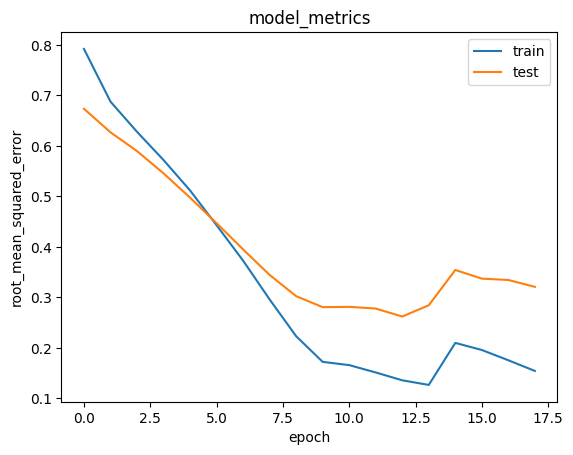

In [ ]:
# membuat grafik yang menampilkan perkembangan root mean squared error (RMSE) selama training dan validasi model di setiap epoch
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
def recommend_products_based_on_name(product_name, top_n=10):
    # memeriksa apakah nama produk sudah terdapat di dalam kamus encoding
    if product_name not in brand_product_to_encoded:
        print(f"Product name '{product_name}' not found.")
        return

    # meng-encode (mengubah) nama produk input menjadi bentuk angka sesuai kamus encoding
    product_name_encoded = brand_product_to_encoded[product_name]

    # mengambil daftar semua ID produk yang sudah di-encode dalam bentuk angka
    all_user_ids = list(user_to_user_encoded.values())

    # di sini kita membuat array dengan isi sama sebanyak jumlah produk
    product_name_array = np.full(len(all_user_ids), product_name_encoded)
    user_id_array = np.array(all_user_ids)

    # menggabungkan array user_id dan product_name menjadi fitur input model
    input_array = np.column_stack((user_id_array, product_name_array))

    # melakukan prediksi skor popularitas menggunakan model untuk setiap kombinasi produk
    popularity_scores = model.predict(input_array).flatten()

    # mengambil indeks produk dengan skor popularitas tertinggi sebanyak top_n produk
    top_indices = popularity_scores.argsort()[-top_n:][::-1]

    # mengambil encoded product ID dari hasil indeks teratas
    recommended_encoded_ids = [all_user_ids[i] for i in top_indices]

    # mengubah kembali encoded product ID menjadi product ID asli (string)
    recommended_user_ids = [user_encoded_to_user.get(pid) for pid in recommended_encoded_ids]

    # menampilkan hasil rekomendasi produk skincare berdasarkan produk input
    print(f"Recommendations based on the product: '{product_name}'")
    print(f"Top {top_n} skincare products for you:")

    # melakukan iterasi untuk setiap produk yang direkomendasikan
    for prod_id in recommended_user_ids:
        if prod_id is not None:
            # mencari data produk dalam dataset berdasarkan user_id
            product_info = dataset_filter[dataset_filter["user_id"] == prod_id]
            if not product_info.empty:
                # menampilkan informasi produk: nama, bahan & jenis kulit, dan rating
                print(
                    f"Product: {product_info['Brand_Product'].values[0]} | "
                    f"Ingredients & Skin Types: {product_info['Ingredient_Skin'].values[0]} | "
                    f"Rating: {product_info['Rank'].values[0]}"
                )
            else:
                print(f"Product ID '{prod_id}' not found in dataset.")


In [ ]:
# menampilkan baris sesuai nama brand dan nama produk yang ditulis
dataset_filter[dataset_filter.Brand_Product.eq('CLINIQUE - Pep-Start 2-in-1 Exfoliating Cleanser (Cleanser)')]

,Brand,Name,Rank,user_id,Brand_Product,Ingredient_Skin,user,name
416,CLINIQUE,Pep-Start 2-in-1 Exfoliating Cleanser,4.5,CLI416,CLINIQUE - Pep-Start 2-in-1 Exfoliating Cleans...,"(Cleanser) Water , Glycerin , Sodium Laureth S...",416,416


In [ ]:
# memanggil fungsi rekomendasi dengan input nama produk tertentu
recommend_products_based_on_name('CLINIQUE - Pep-Start 2-in-1 Exfoliating Cleanser (Cleanser)')

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Recommendations based on the product: 'CLINIQUE - Pep-Start 2-in-1 Exfoliating Cleanser (Cleanser)'
Top 10 skincare products for you:
Product: PERRICONE MD - High Potency Classics: Hyaluronic Intensive Moisturizer (Treatment) | Ingredients & Skin Types: (Treatment) Visit the Perricone MD boutique | Rating: 4.5
Product: KIEHL'S SINCE 1851 - Hydro-Plumping Re-Texturizing Serum Concentrate (Treatment) | Ingredients & Skin Types: (Treatment) Water, Glycerin, Dimethicone, Propanediol, Dimethicone/PEG-10/15 Crosspolymer, Polymethylsilsesquioxane, Sodium Chloride, Phenoxyethanol, Butylene Glycol, Chlorphenesin, Sodium Citrate, p-Anisic Acid, Disodium EDTA, PEG-10 Dimethicone, Sodium Hydroxide, Adenosine, Perilla Ocymoides Extract/Perilla Ocymoides Leaf Extract, Citric Acid. | Rating: 4.7
Product: CAUDALIE - Vinosource S.O.S Thirst Quenching Serum (Treatment) | Ingredients & Skin Types: (Treatment) Water, Vitis Vinifera (Grape) Fruit Water*, Glycerin*, Bu